# Bacterium in Environment Visualization
## Cross-sectional view of a spherical bacterium with boundary labeling

This notebook builds up the visualization sequentially, adding:
1. Base bacterium figure
2. Sensor boxes (s₁, s₂, s₃) on the bacterium box boundary
3. Actuator boxes (a₁, a₂, a₃) on the flagellae
4. Model box with λ parameter inside the cell

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.patches import FancyBboxPatch, Circle, Wedge
from matplotlib.collections import PatchCollection
import os

# Create outputs directory if it doesn't exist
os.makedirs('outputs', exist_ok=True)

## Helper Function: Create Base Figure

This function creates the base bacterium visualization that we'll build upon.

In [10]:
def create_base_figure():
    """
    Create the base bacterium visualization.
    
    Returns:
        fig, ax: matplotlib figure and axis objects
        params: dictionary containing key parameters for adding elements
    """
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    
    # Set up the coordinate system
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 7)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # STEP 1: Create large rectangular Environment box
    env_box_x = 0.5
    env_box_y = 0.5
    env_box_width = 11
    env_box_height = 6
    
    environment_box = patches.Rectangle((env_box_x, env_box_y), env_box_width, env_box_height,
                                         linewidth=3, edgecolor='#0077BE', 
                                         facecolor='#E8F4F8', zorder=1)
    ax.add_patch(environment_box)
    
    # Add "Environment" label in top-right of the box
    ax.text(env_box_x + env_box_width - 0.3, env_box_y + env_box_height - 0.3, 
            'Environment', fontsize=14, fontweight='bold',
            ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#0077BE', linewidth=1.5))
    
    # STEP 2: Create smaller rectangular Bacterium box inside Environment box
    bact_box_x = 2
    bact_box_y = 0.75
    bact_box_width = 5
    bact_box_height = 5.5
    
    bacterium_box = patches.Rectangle((bact_box_x, bact_box_y), bact_box_width, bact_box_height,
                                       linewidth=3, edgecolor='#8B4513', 
                                       facecolor='#F5DEB3', zorder=2)
    ax.add_patch(bacterium_box)
    
    # Add "Bacterium" label in top-right of the box
    ax.text(bact_box_x + bact_box_width - 0.3, bact_box_y + bact_box_height - 0.3, 
            'Bacterium', fontsize=14, fontweight='bold',
            ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#8B4513', linewidth=1.5))
    
    # STEP 3: Draw the bacterium illustration
    bacterium_center_x = bact_box_x + 2.2
    bacterium_center_y = bact_box_y + 2.8
    center = (bacterium_center_x, bacterium_center_y)
    
    # Define bacterium parameters
    cytoplasm_radius = 1.2
    membrane_radius = 1.32
    cell_wall_radius = 1.4
    
    # Draw the cell wall (outer layer)
    cell_wall = Circle(center, cell_wall_radius, color='#8B7355', zorder=3)
    ax.add_patch(cell_wall)
    
    # Draw the cell membrane
    cell_membrane = Circle(center, membrane_radius, color='#D4A574', zorder=4)
    ax.add_patch(cell_membrane)
    
    # Draw the cytoplasm (interior)
    cytoplasm = Circle(center, cytoplasm_radius, color='#FFE4B5', alpha=0.7, zorder=5)
    ax.add_patch(cytoplasm)
    
    # Nucleoid region (DNA area)
    nucleoid = Circle(center, 0.5, color='#FFD9A0', alpha=0.8, zorder=6)
    ax.add_patch(nucleoid)
    
    # Ribosomes (small dots scattered in cytoplasm)
    np.random.seed(42)
    n_ribosomes = 30
    for _ in range(n_ribosomes):
        angle = np.random.uniform(0, 2*np.pi)
        r = np.random.uniform(0.55, 1.15)
        x = bacterium_center_x + r * np.cos(angle)
        y = bacterium_center_y + r * np.sin(angle)
        ribosome = Circle((x, y), 0.04, color='#8B4513', zorder=7)
        ax.add_patch(ribosome)
    
    # Draw flagella (whip-like structures)
    flagella_angles = [45, 135, -90]  # Degrees
    flagella_colors = ['#654321', '#654321', '#654321']
    
    for i, angle_deg in enumerate(flagella_angles):
        angle_rad = np.radians(angle_deg)
        
        # Starting point at cell wall
        start_x = bacterium_center_x + cell_wall_radius * np.cos(angle_rad)
        start_y = bacterium_center_y + cell_wall_radius * np.sin(angle_rad)
        
        # Create wavy flagellum using a parametric curve
        t = np.linspace(0, 1, 100)
        length = 1.2
        
        # Parametric equations for wavy flagellum
        flagellum_x = start_x + length * t * np.cos(angle_rad) + 0.15 * np.sin(8 * np.pi * t) * np.sin(angle_rad)
        flagellum_y = start_y + length * t * np.sin(angle_rad) - 0.15 * np.sin(8 * np.pi * t) * np.cos(angle_rad)
        
        # Gradually decrease line width to taper the flagellum
        for j in range(len(t)-1):
            width = 2.5 * (1 - t[j] * 0.7)
            ax.plot(flagellum_x[j:j+2], flagellum_y[j:j+2], 
                    color=flagella_colors[i], linewidth=width, zorder=2, solid_capstyle='round')
    
    # Store parameters for later use
    params = {
        'bact_box_x': bact_box_x,
        'bact_box_y': bact_box_y,
        'bact_box_width': bact_box_width,
        'bact_box_height': bact_box_height,
        'bacterium_center_x': bacterium_center_x,
        'bacterium_center_y': bacterium_center_y,
        'cell_wall_radius': cell_wall_radius,
        'flagella_angles': flagella_angles
    }
    
    return fig, ax, params

## Step 0: Base Figure

Create and display the base bacterium visualization.

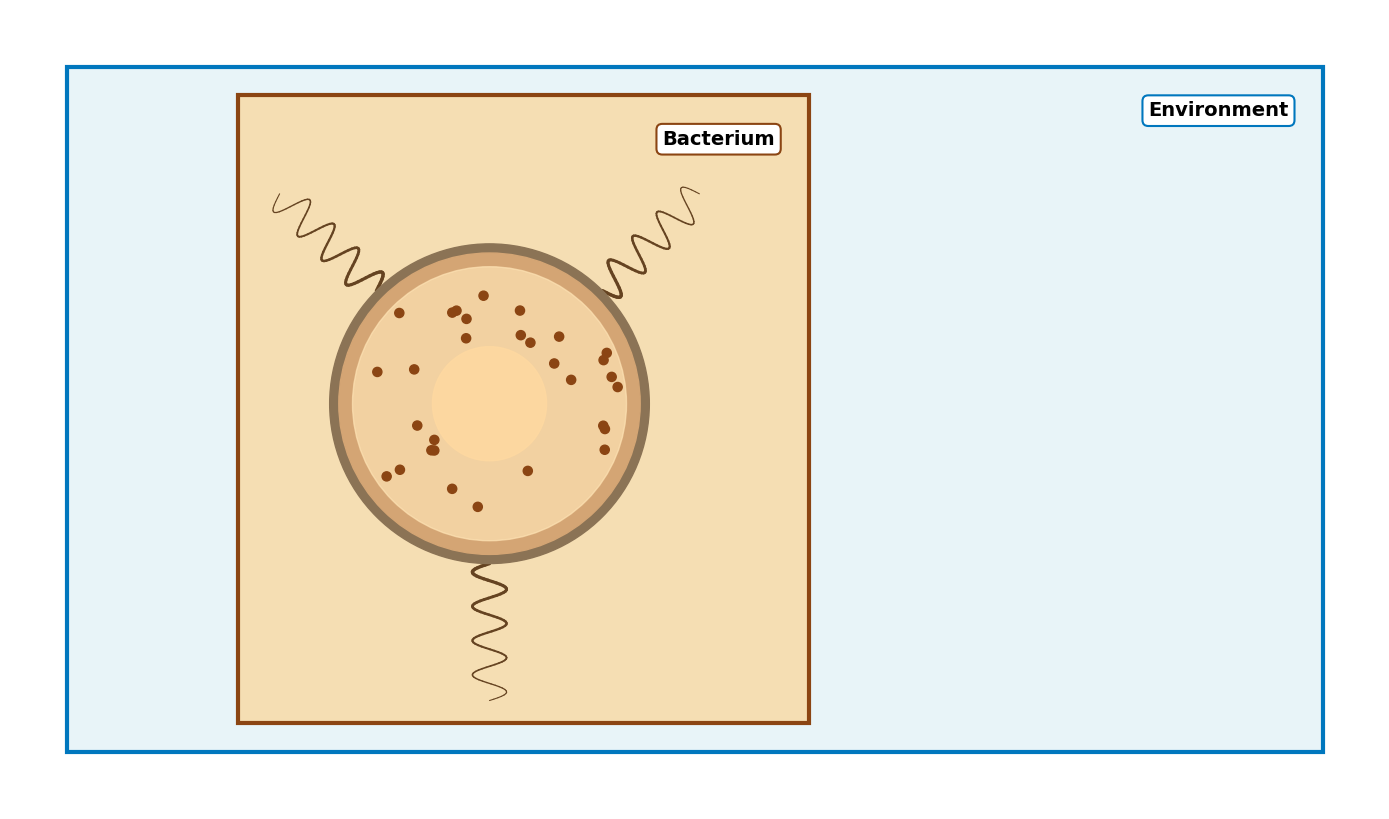

Saved: outputs/step0_base_bacterium.png


In [12]:
# Create base figure
fig, ax, params = create_base_figure()

plt.tight_layout()
plt.show()

# Save base figure
fig.savefig('outputs/step0_base_bacterium.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Saved: outputs/step0_base_bacterium.png")

## Step 1: Add Sensor Boxes (s₁, s₂, s₃)

Add three small boxes on the right edge of the Bacterium box, evenly distributed.

In [13]:
def add_sensor_boxes(ax, params):
    """
    Add sensor boxes (s_1, s_2, s_3) on the right edge of the Bacterium box.
    
    Args:
        ax: matplotlib axis object
        params: dictionary containing bacterium box parameters
    """
    bact_box_x = params['bact_box_x']
    bact_box_y = params['bact_box_y']
    bact_box_width = params['bact_box_width']
    bact_box_height = params['bact_box_height']
    
    # Sensor box dimensions
    sensor_box_width = 0.6
    sensor_box_height = 0.4
    
    # Position on right edge, evenly distributed
    right_edge_x = bact_box_x + bact_box_width - sensor_box_width / 2
    y_positions = [bact_box_y + bact_box_height * (i + 1) / 4 for i in range(3)]  # 1/4, 2/4, 3/4 heights
    
    sensor_labels = [r'$s_1$', r'$s_2$', r'$s_3$']
    
    for i, y_pos in enumerate(y_positions):
        # Create small box centered on the right edge
        sensor_box = patches.FancyBboxPatch(
            (right_edge_x - sensor_box_width / 2, y_pos - sensor_box_height / 2),
            sensor_box_width, sensor_box_height,
            boxstyle='round,pad=0.02',
            linewidth=1.5, edgecolor='#2E8B57', facecolor='#98FB98', zorder=10
        )
        ax.add_patch(sensor_box)
        
        # Add label
        ax.text(right_edge_x, y_pos, sensor_labels[i], fontsize=11, fontweight='bold',
                ha='center', va='center', zorder=11)

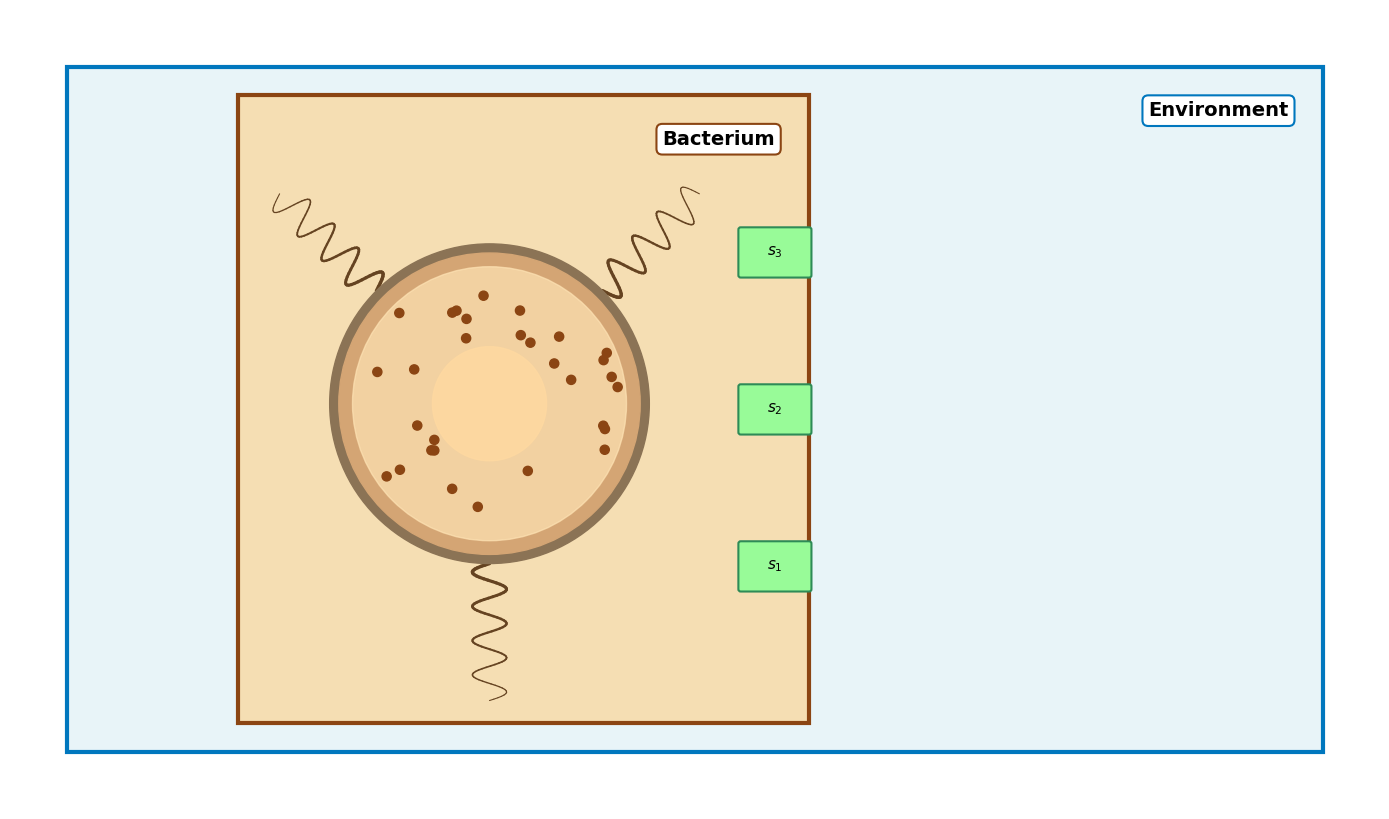

Saved: outputs/step1_with_sensors.png


In [14]:
# Create base figure and add sensor boxes
fig, ax, params = create_base_figure()
add_sensor_boxes(ax, params)

plt.tight_layout()
plt.show()

# Save figure with sensor boxes
fig.savefig('outputs/step1_with_sensors.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Saved: outputs/step1_with_sensors.png")

## Step 2: Add Actuator Boxes (a₁, a₂, a₃)

Add three small boxes on the flagellae, one per flagellum at the midpoint.

In [15]:
def add_actuator_boxes(ax, params):
    """
    Add actuator boxes (a_1, a_2, a_3) on each flagellum.
    
    Args:
        ax: matplotlib axis object
        params: dictionary containing bacterium parameters
    """
    bacterium_center_x = params['bacterium_center_x']
    bacterium_center_y = params['bacterium_center_y']
    cell_wall_radius = params['cell_wall_radius']
    flagella_angles = params['flagella_angles']
    
    # Actuator box dimensions
    actuator_box_width = 0.5
    actuator_box_height = 0.35
    actuator_labels = [r'$a_1$', r'$a_2$', r'$a_3$']
    
    for i, angle_deg in enumerate(flagella_angles):
        angle_rad = np.radians(angle_deg)
        
        # Starting point at cell wall
        start_x = bacterium_center_x + cell_wall_radius * np.cos(angle_rad)
        start_y = bacterium_center_y + cell_wall_radius * np.sin(angle_rad)
        
        # Midpoint of flagellum (t = 0.5)
        t_mid = 0.5
        length = 1.2
        
        # Calculate midpoint position
        mid_x = start_x + length * t_mid * np.cos(angle_rad)
        mid_y = start_y + length * t_mid * np.sin(angle_rad)
        
        # Create small box at midpoint
        actuator_box = patches.FancyBboxPatch(
            (mid_x - actuator_box_width / 2, mid_y - actuator_box_height / 2),
            actuator_box_width, actuator_box_height,
            boxstyle='round,pad=0.02',
            linewidth=1.5, edgecolor='#DC143C', facecolor='#FFB6C1', zorder=10
        )
        ax.add_patch(actuator_box)
        
        # Add label
        ax.text(mid_x, mid_y, actuator_labels[i], fontsize=10, fontweight='bold',
                ha='center', va='center', zorder=11)

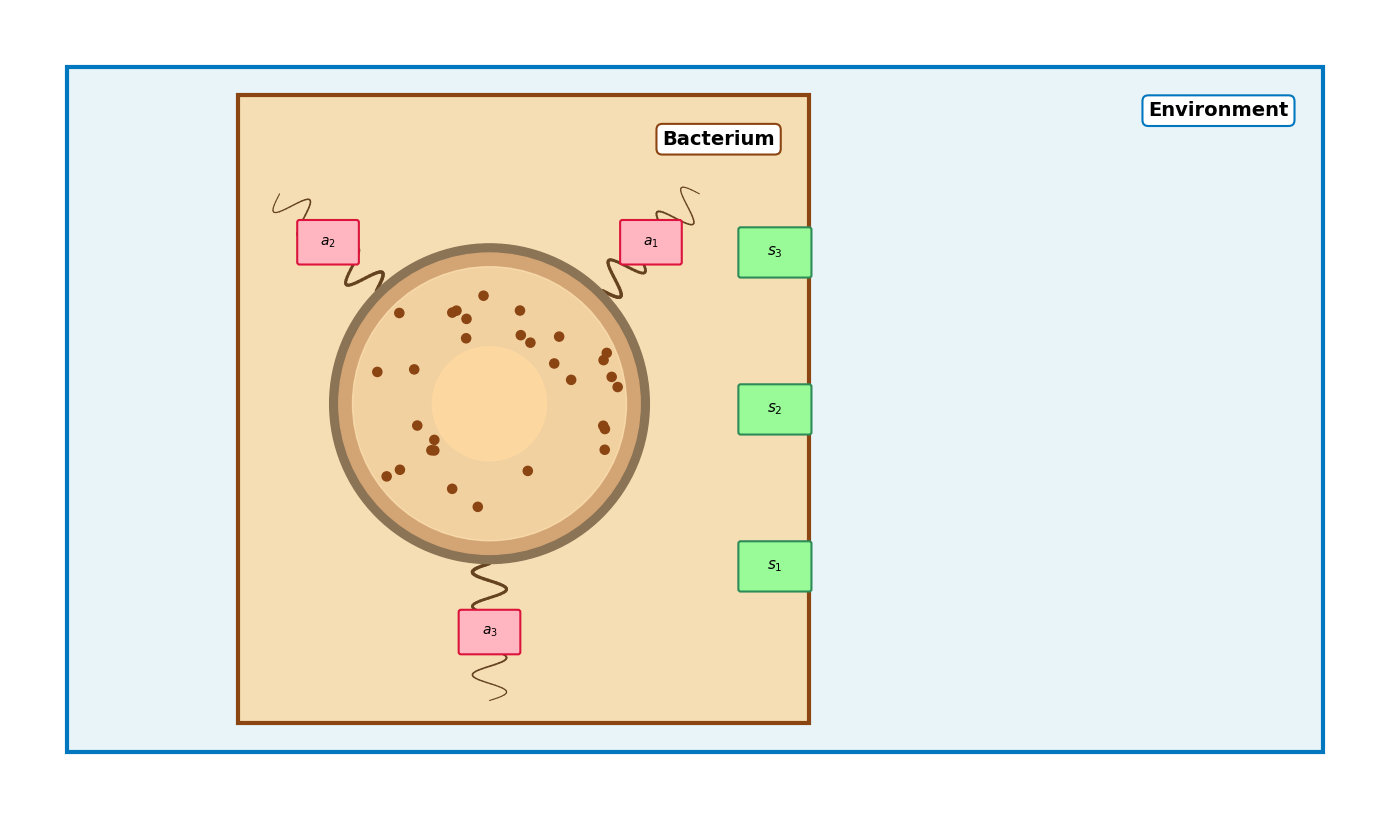

Saved: outputs/step2_with_actuators.png


In [16]:
# Create base figure and add sensor + actuator boxes
fig, ax, params = create_base_figure()
add_sensor_boxes(ax, params)
add_actuator_boxes(ax, params)

plt.tight_layout()
plt.show()

# Save figure with sensor and actuator boxes
fig.savefig('outputs/step2_with_actuators.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Saved: outputs/step2_with_actuators.png")

## Step 3: Add Model Box with λ

Add the Model box inside the bacterium cell wall, containing the parameter λ.

In [21]:
def add_model_box(ax, params):
    """
    Add Model box with lambda parameter inside the bacterium cell.
    
    Args:
        ax: matplotlib axis object
        params: dictionary containing bacterium parameters
    """
    # Environment parameters box params
    env_box_loc_x = 10
    env_box_loc_y = 5

    env_box_width = 1.8
    env_box_height = 0.8
    
    bacterium_center_x = params['bacterium_center_x']
    bacterium_center_y = params['bacterium_center_y']
    
    # Model box dimensions
    model_box_width = 0.8
    model_box_height = 0.6
    
    # Position in upper-right area of the cell (avoiding nucleoid in center)
    model_box_x = bacterium_center_x + 0.3
    model_box_y = bacterium_center_y + 0.4
    
    # Create the Model box
    model_box = patches.FancyBboxPatch(
        (model_box_x - model_box_width / 2, model_box_y - model_box_height / 2),
        model_box_width, model_box_height,
        boxstyle='round,pad=0.05',
        linewidth=2, edgecolor='#4B0082', facecolor='#E6E6FA', zorder=8
    )
    ax.add_patch(model_box)
    
    # Add "Model" label at top of box
    ax.text(model_box_x, model_box_y + 0.15, 'Model', fontsize=8, fontweight='bold',
            ha='center', va='center', zorder=9)
    
    # Add lambda parameter below the label
    ax.text(model_box_x, model_box_y - 0.1, r'$\lambda$', fontsize=12,
            ha='center', va='center', zorder=9)

    # Create the environmental parameters box
    env_box = patches.FancyBboxPatch(
        (env_box_loc_x - env_box_width / 2, env_box_loc_y - env_box_height / 2),
        env_box_width, env_box_height,
        boxstyle='round,pad=0.05',
        linewidth=2, edgecolor='#4B0082', facecolor='#E6E6FA', zorder=8
    )
    ax.add_patch(env_box)
    
    # Add "Environmental parameters" label at top of Environment box
    ax.text(env_box_loc_x, env_box_loc_y, 'Parameters', fontsize=14, fontweight='bold',
            ha='center', va='center', zorder=9)
    
    # Add Omega parameter below the label
    ax.text(env_box_loc_x, env_box_loc_y - 0.2, r'$\Omega$', fontsize=14, fontweight='bold',
            ha='center', va='center', zorder=9)
    

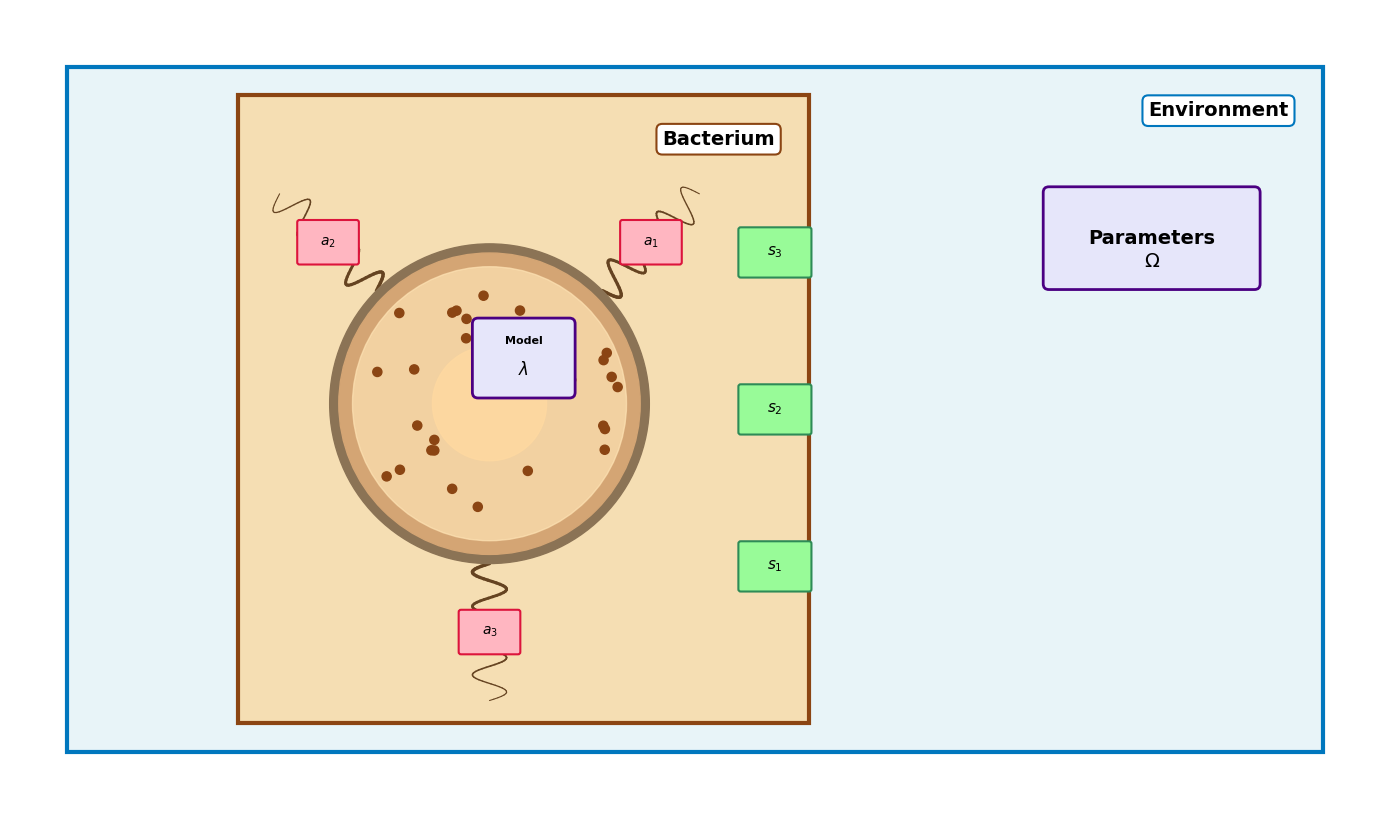

Saved: outputs/step3_complete.png


In [22]:
# Create complete figure with all elements
fig, ax, params = create_base_figure()
add_sensor_boxes(ax, params)
add_actuator_boxes(ax, params)
add_model_box(ax, params)

plt.tight_layout()
plt.show()

# Save final figure
fig.savefig('outputs/step3_complete.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Saved: outputs/step3_complete.png")

## Summary

The visualization has been built up sequentially with the following outputs:

| Step | Description | Output File |
|------|-------------|-------------|
| 0 | Base bacterium visualization | `outputs/step0_base_bacterium.png` |
| 1 | + Sensor boxes (s₁, s₂, s₃) | `outputs/step1_with_sensors.png` |
| 2 | + Actuator boxes (a₁, a₂, a₃) | `outputs/step2_with_actuators.png` |
| 3 | + Model box with λ | `outputs/step3_complete.png` |

### Element Details:

- **Sensor boxes (green)**: Located on the right edge of the Bacterium box at 1/4, 1/2, and 3/4 heights
- **Actuator boxes (pink)**: Located at the midpoint of each of the 3 flagellae
- **Model box (purple)**: Inside the cell, offset from center to avoid the nucleoid